<font face="B Mitra" size=4>
<div dir=rtl align=center>

<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">

<br>
<font size=2>
<b>دانشگاه صنعتی امیرکبیر - دانشکده ریاضی و علوم کامپیوتر</b>
</font>

<br>
<font size=6>
<b>مقدمه‌ای بر پردازش تصویر</b>
</font>

<br>
<hr/>
<font size=6>
<b>کارگاه پنجم: تبدیلات تصویر و مقدمات هیستوگرام در OpenCV</b>
</font>

<br>
استاد: دکتر مصطفی شمسی

<br>
طراح:‌ پیمان پاک نژاد

<hr>
</div>
</font>


# <!DOCTYPE html>
<html dir="rtl" lang="fa">
<font face="B Mitra" size=7>
<div dir="rtl">کتابخانه‌های مورد نیاز</div>
</font>
<font face="B Mitra" size=5>
<div dir="rtl">صرفا سلول زیر را اجرا کنید</div>
</font>

In [ ]:
import cv2
import requests # For reading image from URL
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image

def download_image_from_url(url):
    filename, ext = url.split("/")[-1].split(".")
    # Send an HTTP GET request to the URL
    response = requests.get(url)
    # Check if the request was successful (status code 200 indicates success)
    if response.status_code == 200:
        # Get the content of the response (the image data)
        image_data = response.content
        # Specify the path where you want to save the image
        save_path = f"{filename}.{ext}"  # Replace with the desired file name and location
        # Open a binary file in write mode and write the image data to it
        with open(save_path, "wb") as file:
            file.write(image_data)
        print(f"Image downloaded and saved as {save_path}")
        return cv2.imread(save_path)
    else:
        print(f"Failed to download the image. Status code: {response.status_code}")

<font face="B Mitra" size=7>
<b>
<div dir="rtl">سوال اول-الف</dir>
</b>
</font>


<font face="B Mitra" size=5>
    <div dir="rtl">
        <b>
        <p>تبدیلات شدت نقطه‌ای، یا تغییرات نقطه‌ای در داده‌های تصویری، روش‌های موثری هستند برای اصلاح یا بهبود کیفیت تصاویر دیجیتال. این تکنیک‌ها شامل تنظیم روشنایی، کنتراست و تصحیح رنگ به صورت نقطه به نقطه بر روی تصویر است. با اعمال این تبدیلات، تصاویری که شاید در ابتدا کدر، بی‌زندگی یا نامتعادل به نظر می‌رسند، می‌توانند به شکل چشمگیری با وضوح و دقت رنگی بهتری نمایش داده شوند. مثلاً، با افزایش کنتراست، جزئیات بیشتری در نواحی تیره و روشن تصویر آشکار می‌شود، و با تنظیمات رنگی می‌توان تعادل رنگ‌ها را برای نمایش دقیق‌تر واقعیت تصحیح کرد. این تبدیلات می‌توانند به صورت دستی یا خودکار و با بهره‌گیری از الگوریتم‌های  که نمایه‌های رنگی و شدت نور تصویر را تجزیه و
        تحلیل می‌کنند، اجرا شوند
        .در بخش اول این تمرین به برخی از روش ها خواهیم پرداخت</p>
        </b>
    </div>
</font>


<font face="B Mitra" size=6>
<b>
<div dir="rtl">هیستوگرام</dir>
</b>
</font>


<font face="B Mitra" size=6>
    <div dir="rtl">
        <b>
        <p>هیستوگرام تصویر، که نموداری از توزیع شدت‌های روشنایی یا رنگ‌ها در یک تصویر است، ابزار مهمی برای درک اطلاعات مربوط به کنتراست و تعادل نور در تصویر می‌باشد. این اطلاعات به عکاسان و ویراستاران کمک می‌کند تا بهینه‌سازی های مورد نیاز بر روی تصاویر را شناسایی و اعمال کنند، و از این طریق کیفیت بصری نهایی تصویر را ارتقاء دهند.</p>
        </b>
        <br/>
        </font>
        <font face="B Mitra" size=4.5>
        <b>
        هیستوگرام را برای تصاویر سیاه و سفید و رنگی زیر رسم کرده و کنتراست روشنایی و رنج دینامیکی را تحلیل کنید
        </b>
        </font>
    </div>
</font>

Image downloaded and saved as A.jpg


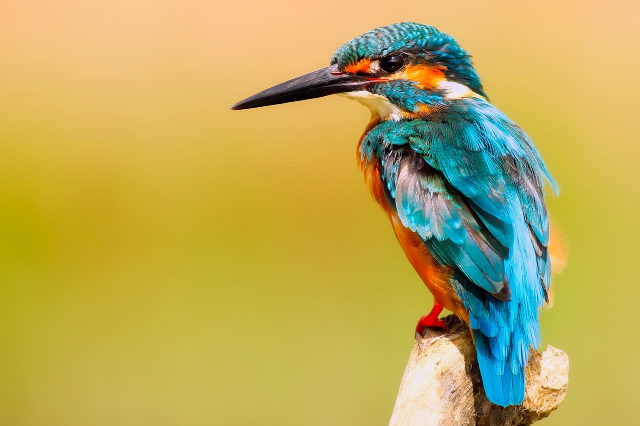

In [ ]:
# Load the input image
download_image_from_url("https://i.ibb.co/tYkStWD/A.jpg")
original_image_path = '/content/A.jpg'
image = cv2.imread(original_image_path)
height, width, _ = image.shape
image = cv2.resize(image, (width // 2, height // 2), interpolation=cv2.INTER_LINEAR)

# Display the original image
cv2_imshow(image)

Image downloaded and saved as img.jpg


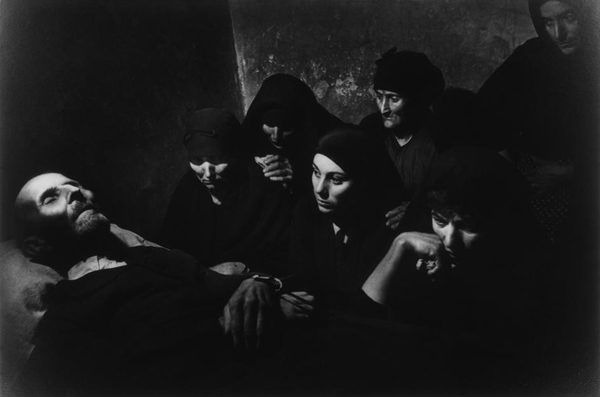

In [ ]:
# Load the input image
download_image_from_url("https://i.ibb.co/HTn3gZx/img.jpg")
original_image_path = '/content/img.jpg'
image = cv2.imread(original_image_path)
height, width, _ = image.shape
image = cv2.resize(image, (width // 1, height // 1), interpolation=cv2.INTER_LINEAR)
# Display the original image
cv2_imshow(image)

In [ ]:
# your code

Image downloaded and saved as B.jpg


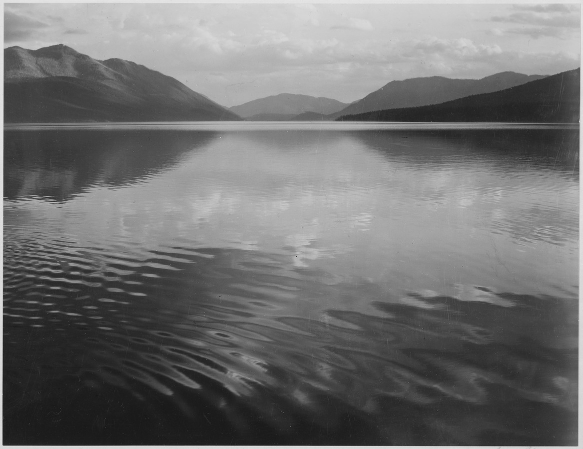

In [ ]:
# Load the input image
download_image_from_url("https://i.ibb.co/7C0HcYV/B.jpg")
original_image_path = '/content/B.jpg'
image = cv2.imread(original_image_path)
height, width, _ = image.shape
image = cv2.resize(image, (width // 2, height // 2), interpolation=cv2.INTER_LINEAR)
# Display the original image
cv2_imshow(image)

In [ ]:
# your code

<font face="B Mitra" size=7>
<b>
<div dir="rtl">سوال اول-ب</dir>
</b>
</font>



<font face="B Mitra" size=6>
    <div dir="rtl">
        <b>
            بهبود کنتراست
        </b>
    </div>
</font>

<font face="B Mitra" size=5>
    <b>
    <div dir="rtl">
        <p>
            بهبود کنتراست در تصاویر به معنی افزایش تفاوت شدت‌های نوری بین نقاط تاریک و روشن آن است، که منجر به تصاویر واضح‌تر و با جزئیات بیشتر می‌شود. روش‌های مختلفی برای این منظور وجود دارد، از جمله استفاده از توابع تبدیل خطی که دامنه شدت‌های را گسترش می‌دهد و هیستوگرام تصویر را فراگیرتر می‌کند.
            <br/>
            <br/>
            <font face="B Mitra" size=4.5>
            با استفاده از توابع تبدیل خطی که در درس آموختید نگاتیو تصویر زیر را به تصویر مناسب تبدیل کنید.
            </font>
        </p>
    </div>
    </b>
</font>

Image downloaded and saved as negative.png


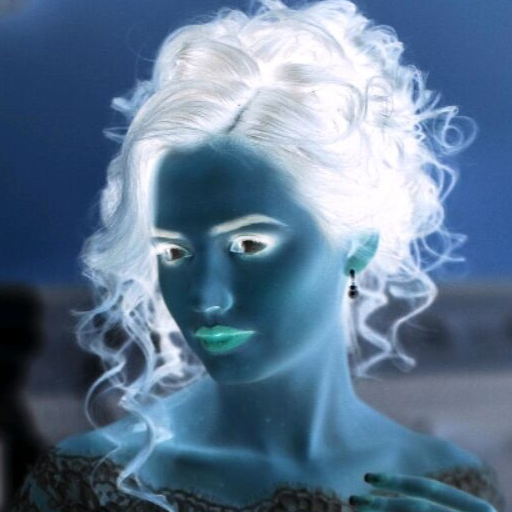

In [ ]:
# Load the input image
download_image_from_url("https://i.ibb.co/pnFJy5w/negative.png")
original_image_path = '/content/negative.png'
image = cv2.imread(original_image_path)

# Display the original image
cv2_imshow(image)

<font face="B Mitra" size=7>
<b>
<div dir="rtl">سوال دوم-الف</dir>
</b>
</font>


<font face="B Mitra" size=6>
    <div dir="rtl">
        <b>
            تابع تبدیل شدت لگاریتمی
        </b>
    </div>
</font>

<font face="B Mitra" size=5>
    <b>
    <div dir="rtl">
         <p>تابع تبدیل لگاریتمی در پردازش تصاویر با تأکید بر نمایش جزئیات در ناحیه‌های تاریک استفاده می‌شود. این تبدیل با استفاده از لگاریتم، شدت‌های پایین تصویر را افزایش داده و کنتراست را در این نواحی بهبود می‌بخشد، منجر به آشکارسازی بهتر جزئیات می‌شود.
         <br/><br/>
         <font face="B Mitra" size=4.5>
    این تابع را بر روی تصویر زیر اعمال کرده و تصویر جدید و هیستوگرام را رسم کنید.
        </font>
        </p>
    </div>
    </b>
</font>

Image downloaded and saved as Image.jpg


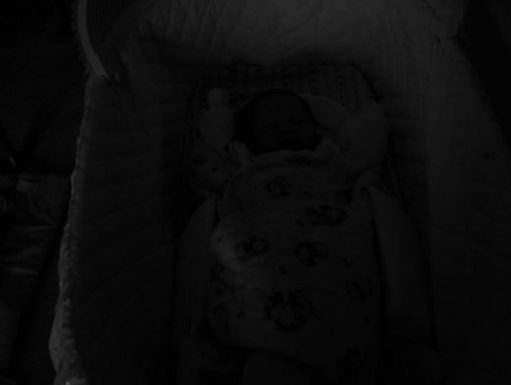

In [ ]:
# Load the input image
download_image_from_url("https://i.ibb.co/8Pkw5F4/Image.jpg")
original_image_path = '/content/Image.jpg'
image = cv2.imread(original_image_path)
height, width, _ = image.shape
image = cv2.resize(image, (width // 2, height // 2), interpolation=cv2.INTER_LINEAR)
# Display the original image
cv2_imshow(image)

In [ ]:
# your code

<font face="B Mitra" size=7>
<b>
<div dir="rtl">سوال دوم-ب</dir>
</b>
</font>

<font face="B Mitra" size=6>
    <div dir="rtl">
        <b>
کشش هیستوگرام        </b>
    </div>
</font>

<font face="B Mitra" size=5>
    <b>
    <div dir="rtl">
          <p>کشش هیستوگرام رویکردی است که دامنه شدت‌های موجود در تصویر را فراگیر می‌کند تا کنتراست را افزایش دهد؛ این کار با کشیدن انتهاهای هیستوگرام تصویر و توزیع دوباره شدت‌ها در کل دامنه ممکن انجام می‌شود. در مقابل، مسطح‌سازی هیستوگرام به فرآیند تنظیم توزیع شدت نور در هیستوگرام اطلاق می‌گردد به گونه‌ای که تمامی شدت‌ها بطور یکنواخت در دسترس باشند، این امر باعث بهبود کنتراست کلی در تصویر می‌شود.<br>
    این دو روش را بر روی تصویر قبل اعمال کرده و هیستوگرام آنهارا رسم کنید(پیاده سازی این دو روش باید توسط خود شما صورت بگیرد)
    </div>
    </b>
</font>

In [ ]:
# your code

<font face="B Mitra" size=6>
    <div dir="rtl">
        <b>
            فیلتر
        </b>
    </div>
</font>


<font face="B Mitra" size=5>
    <b>
    <div dir="rtl">
          <p>در پردازش تصویر، فیلترها عناصر حیاتی هستند که برای اصلاح، بهبود و استخراج اطلاعات از تصاویر استفاده می‌شوند. فیلترهای خطی مانند فیلتر میانگین  و فیلتر گوسی  برای هموارسازی تصویر و کاهش نویز بکار می‌روند، در حالی که فیلترهای لبه‌یاب مانند Sobel یا Canny برای شناسایی لبه‌ها و خطوط در تصاویر استفاده می‌شوند. همچنین، فیلترهای غیرخطی مانند میانه  می‌توانند نویز نقطه‌ای را کاهش دهند بدون اینکه لبه‌های تصویر مبهم شوند. این فیلترها از طریق عملیات کانولوشن یا ماسک‌های فیلتر بر روی پیکسل‌ها پیاده‌سازی شده و نتایج متنوعی را برای اهداف مختلف پردازش تصویر ارائه می‌دهند.<br>
    در ادامه تمرین به این مبحث خواهیم پرداخت.
</p>
    </div>
    </b>
</font>

Image downloaded and saved as D.jpg


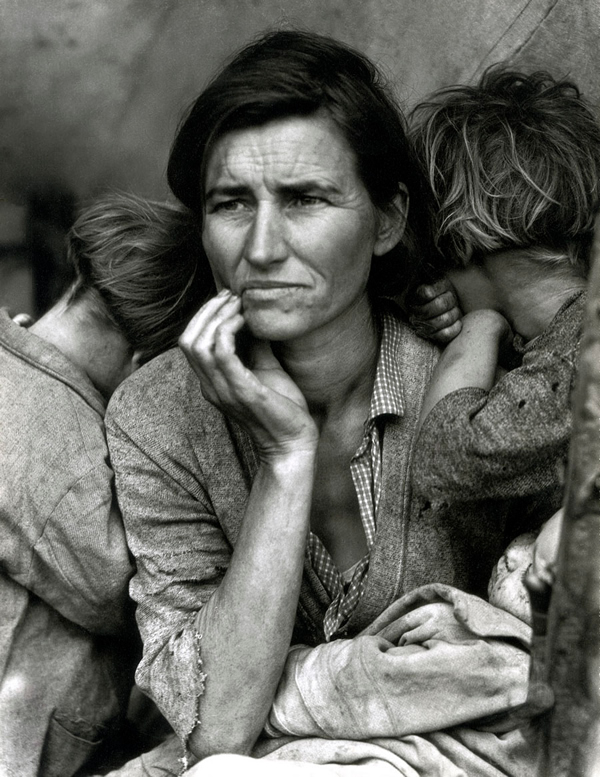

In [ ]:
# Load the input image
download_image_from_url("https://i.ibb.co/QXQx81x/D.jpg")
original_image_path = '/content/D.jpg'
image = cv2.imread(original_image_path)

# Display the original image
cv2_imshow(image)

<font face="B Mitra" size=7>
<b>
<div dir="rtl">سوال سوم-الف</dir>
</b>
</font>

<font face="B Mitra" size=6>
    <div dir="rtl">
        <b>
            پیاده‌سازی
        </b>
    </div>
</font>



<font face="B Mitra" size=5>
    <b>
    <div dir="rtl">
          <p>تابعی بنویسید که با دریافت یک ماتریس ماسک و یک تصویر فیلتر زیر را بر روی آن اعمال کند.<br>
<br>
<img src="https://i.ibb.co/3sWQMkP/kernel.jpg" alt="kernel" width="150">
    <br>الف) مقادیر ده پیکسل دلخواه از ماتریس را قبل و بعد از اعمال فیلتر مقایسه کنید.<br>
    <br>
    ب) آیا این تابع برای سایر فیلتر ها نیز قابل استفاده است؟ تغییرات لازم را برای قابل استفاده ساختن این تابع برای انواع تصاویر و فیلتر ها اعمال کنید.
</p>
    </div>
    </b>
</font>

In [ ]:
# your code

<font face="B Mitra" size=7>
<b>
<div dir="rtl">سوال سوم-ب</dir>
</b>
</font>

<font face="B Mitra" size=5>
    <b>
    <div dir="rtl">
          <p>فیلتر میانگین یک تکنیک پردازش تصویر است که برای کاهش نویز از تصاویر استفاده می‌شود. این فیلتر با محاسبه میانگین مقادیر شدت پیکسل‌های همسایه برای هر پیکسل و جایگزینی این میانگین با مقدار پیکسل مرکزی، نویز را می‌کاهد، که این فرآیند منجر به هموار شدن کلی تصویر می‌شود. با این حال، کاربرد این فیلتر ممکن است با کاهش جزئیات دقیق نیز همراه باشد.<br/><br/>
    این فیلتر را پیاده سازی کرده و بر روی تصویر زیر اعمال کنید(با ابعاد 3*3 و 3*4).
    
</p>
    </div>
    </b>
</font>

Image downloaded and saved as E.jpg


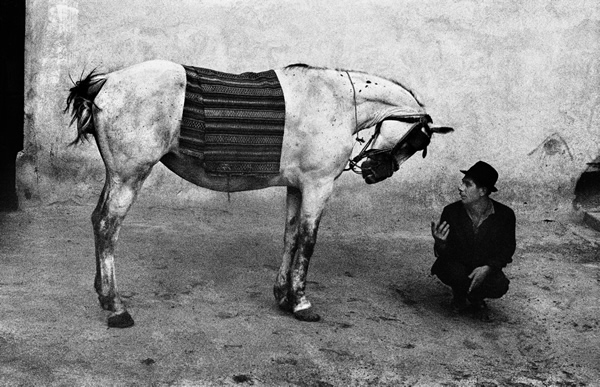

In [ ]:
# Load the input image
download_image_from_url("https://i.ibb.co/sbtsv5z/E.jpg")
original_image_path = '/content/E.jpg'
image = cv2.imread(original_image_path)

# Display the original image
cv2_imshow(image)

<font face="B Mitra" size=7>
<b>
<div dir="rtl">سوال چهارم</dir>
</b>
</font>

<font face="B Mitra" size=5>
    <b>
    <div dir="rtl">
           <p>فیلتر سوبل یک تکنیک مرسوم در تشخیص لبه‌های تصویر است که می‌تواند جزئیات و تغییرات شدت روشنایی را در تصاویر به خوبی شناسایی کند. این رویکرد از دو کرنل (یکی برای افقی و دیگری برای عمودی) استفاده می‌کند تا گرادیان تصویر را در هر جهت حساب کرده و شدت لبه‌ها را مشخص نماید. فیلتر سوبل از طریق عملیات کانولوشن کرنل‌ها با تصویر ورودی سرعت بالایی در محاسبه دارد. نتایج بدست آمده از این فیلتر به ویژه برای شناخت لبه‌ها در شرایطی که تغییرات روشنایی تدریجی است، مفید است. استفاده از این فیلتر معمولاً در مراحل اولیه تشخیص الگوها و تجزیه و تحلیل تصاویر استراتژیک می‌باشد، زیرا شناسایی صحیح لبه‌ها یکی از پیش‌نیازهای اصلی برای درک بهتر تصویر است.<br/><br/>
    الگوریتم سوبل را پیاده سازی کرده و بر روی تصویر زیر اعمال کنید.
</p>
    </div>
    </b>
</font>

Image downloaded and saved as F.jpg


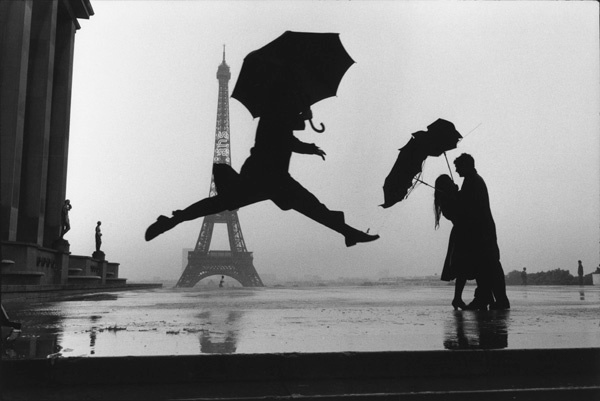

In [ ]:
# Load the input image
download_image_from_url("https://i.ibb.co/KXZrVWz/F.jpg")
original_image_path = '/content/F.jpg'
image = cv2.imread(original_image_path)

# Display the original image
cv2_imshow(image)

<font face="B Mitra" size=6>
    <div dir="rtl">
        <b>
            سوبل
        </b>
    </div>
</font>

<font face="B Mitra" size=5>
    <b>
    <div dir="rtl">
           <p>
    در برخی مواقع ترکیب روش هاو الگوریتم های مختلف باعث بهبود نتایج بدست آمده خواهد شد.<br>
    در این الگوریتم سوبل را بر روی تصویر اعمال کنید. سپس یکی از روش های بهبود کنتراست را یر روی تصویر اعمال کرده و مجددا لبه یابی را انجام دهید. نتایج بدست آمده را با یکدیگر مقایسه کنید.
</p>
    </div>
    </b>
</font>

Image downloaded and saved as img.jpg


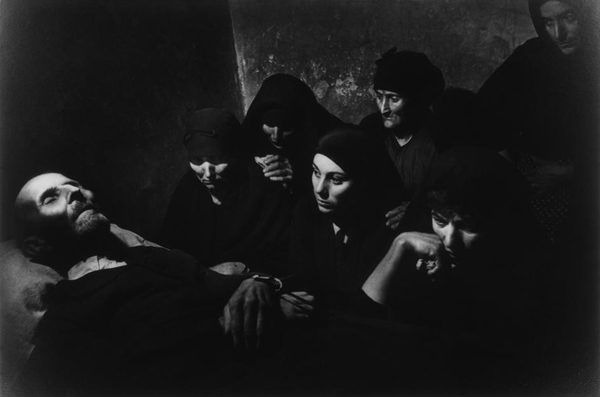

In [ ]:
# Load the input image
download_image_from_url("https://i.ibb.co/HTn3gZx/img.jpg")
original_image_path = '/content/img.jpg'
image = cv2.imread(original_image_path)

# Display the original image
cv2_imshow(image)

In [ ]:
# your code